# Automatidata project 
**Course 4 - The Power of Statistics**

You are a data professional in a data consulting firm, called Automatidata. The current project for their newest client, the New York City Taxi & Limousine Commission (New York City TLC) is reaching its midpoint, having completed a project proposal, Python coding work, and exploratory data analysis.

You receive a new email from Uli King, Automatidata’s project manager. Uli tells your team about a new request from the New York City TLC: to analyze the relationship between fare amount and payment type. A follow-up email from Luana includes your specific assignment: to conduct an A/B test. 

A notebook was structured and prepared to help you in this project. Please complete the following questions.


# Course 4 End-of-course project: Statistical analysis

In this activity, you will practice using statistics to analyze and interpret data. The activity covers fundamental concepts such as descriptive statistics and hypothesis testing. You will explore the data provided and conduct A/B and hypothesis testing.  
<br/>   

**The purpose** of this project is to demostrate knowledge of how to prepare, create, and analyze A/B tests. Your A/B test results should aim to find ways to generate more revenue for taxi cab drivers.

**Note:** For the purpose of this exercise, assume that the sample data comes from an experiment in which customers are randomly selected and divided into two groups: 1) customers who are required to pay with credit card, 2) customers who are required to pay with cash. Without this assumption, we cannot draw causal conclusions about how payment method affects fare amount.

**The goal** is to apply descriptive statistics and hypothesis testing in Python. The goal for this A/B test is to sample data and analyze whether there is a relationship between payment type and fare amount. For example: discover if customers who use credit cards pay higher fare amounts than customers who use cash.
  
*This activity has four parts:*

**Part 1:** Imports and data loading
* What data packages will be necessary for hypothesis testing?

**Part 2:** Conduct EDA and hypothesis testing
* How did computing descriptive statistics help you analyze your data? 

* How did you formulate your null hypothesis and alternative hypothesis? 

**Part 3:** Communicate insights with stakeholders

* What key business insight(s) emerged from your A/B test?

* What business recommendations do you propose based on your results?

<br/> 
Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work. 

# **Conduct an A/B test**


<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: Plan 

In this stage, consider the following questions where applicable to complete your code response:
1. What is your research question for this data project? Later on, you will need to formulate the null and alternative hypotheses as the first step of your hypothesis test. Consider your research question now, at the start of this task.


* Null Hypothesis (H0): The choice of payment method does not have a significant impact on the fare amount for taxi rides.

* Alternative Hypothesis (H1): The choice of payment method does have a significant impact on the fare amount for taxi rides.

*Complete the following steps to perform statistical analysis of your data:* 

### Task 1. Imports and data loading

Import packages and libraries needed to compute descriptive statistics and conduct a hypothesis test.

<details>
  <summary><h4><strong>Hint: </strong></h4></summary>

Before you begin, recall the following Python packages and functions that may be useful:

*Main functions*: stats.ttest_ind(a, b, equal_var)

*Other functions*: mean() 

*Packages*: pandas, stats.scipy

</details>

In [23]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
taxi_data = pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv", index_col = 0)

<img src="images/Analyze.png" width="100" height="100" align=left>

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Analyze and Construct**

In this stage, consider the following questions where applicable to complete your code response:
1. Data professionals use descriptive statistics for Exploratory Data Analysis. How can computing descriptive statistics help you learn more about your data in this stage of your analysis?



### Analyze and Construct Stage

As we move into the "Analyze and Construct" stage of our project, we leverage descriptive statistics for Exploratory Data Analysis (EDA). Descriptive statistics serve as valuable tools to unravel insights hidden within the dataset. Let's explore how computing descriptive statistics enhances our understanding of the data in this stage of analysis.

### Exploring Data with Descriptive Statistics

**Descriptive statistics** provide a concise summary of key characteristics of the dataset. They include measures such as mean, median, standard deviation, minimum, maximum, and quartiles. In the context of our hypothesis test, computing descriptive statistics helps us in the following ways:

1. **Central Tendency:** Calculating the mean and median of fare amounts based on different payment methods gives us a sense of the typical fare values. This helps us understand the average fare amounts associated with each payment type.

2. **Variability:** Standard deviation reveals how much the fare amounts deviate from the mean. Higher standard deviation might indicate greater variability in fare amounts for a particular payment method.

3. **Distribution:** Creating histograms or density plots of fare amounts for different payment methods allows us to visualize their distributions. This can uncover patterns or anomalies.

4. **Comparison:** Comparing descriptive statistics between payment methods allows us to identify potential differences. For instance, comparing means could hint at whether one payment method tends to yield higher fare amounts.

### Enhancing Analysis and Insights

By employing descriptive statistics, we construct a solid foundation for our hypothesis test. These statistics offer a preliminary understanding of the dataset's characteristics, helping us recognize trends, disparities, and potential outliers. This knowledge guides our subsequent hypothesis testing by providing context and initial evidence for or against our research question.

In summary, descriptive statistics serve as our lens into the data's nuances and patterns. They empower us to analyze the data more effectively, aiding in the construction of our hypothesis test and contributing to our goal of extracting meaningful insights to enhance revenue strategies for taxi cab drivers.

### Task 2. Data exploration

Use descriptive statistics to conduct Exploratory Data Analysis (EDA). 

<details>
  <summary><h4><strong>Hint: </strong></h4></summary>

Refer back to *Self Review Descriptive Statistics* for this step-by-step proccess.

</details>

**Note:** In the dataset, `payment_type` is encoded in integers:
*   1: Credit card
*   2: Cash
*   3: No charge
*   4: Dispute
*   5: Unknown



In [7]:
#==> ENTER YOUR CODE HERE
payment_types = {1 : 'Credit card',                                                                            
                 2 : 'Cash',                                                                                     
                 3 : 'No charge',
                 4 : 'Dispute',                                                                                  
                 5 : 'Unknown',                                                  
                 6 : 'Voided trip' }
taxi_data['payment_type_name'] = taxi_data['payment_type'].map(payment_types)
taxi_data['payment_type_name'].value_counts()

Credit card    15265
Cash            7267
No charge        121
Dispute           46
Name: payment_type_name, dtype: int64

You are interested in the relationship between payment type and the fare amount the customer pays. One approach is to look at the average fare amount for each payment type. 

In [8]:
#==> ENTER YOUR CODE HERE
taxi_data.groupby('payment_type_name')['fare_amount'].mean()

payment_type_name
Cash           12.213546
Credit card    13.429748
Dispute         9.913043
No charge      12.186116
Name: fare_amount, dtype: float64

Based on the averages shown, it appears that customers who pay in credit card tend to pay a larger fare amount than customers who pay in cash. However, this difference might arise from random sampling, rather than being a true difference in fare amount. To assess whether the difference is statistically significant, you conduct a hypothesis test.


### Task 3. Hypothesis testing

Before you conduct your hypothesis test, consider the following questions where applicable to complete your code response:

1. Recall the difference between the null hypothesis and the alternative hypotheses. Consider your hypotheses for this project as listed below.

$H_0$: There is no difference in the average fare amount between customers who use credit cards and customers who use cash.

$H_A$: There is a difference in the average fare amount between customers who use credit cards and customers who use cash.



Your goal in this step is to conduct a two-sample t-test. Recall the steps for conducting a hypothesis test: 


1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis 



**Note:** For the purpose of this exercise, your hypothesis test is the main component of your A/B test. 

You choose 5% as the significance level and proceed with a two-sample t-test.

In [24]:
print(taxi_data['fare_amount'].describe())

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64


In [21]:
#==> ENTER YOUR CODE HERE
alpha = 0.05
cash = taxi_data[taxi_data.payment_type_name == 'Cash'] 
card = taxi_data[taxi_data.payment_type_name == 'Credit card']

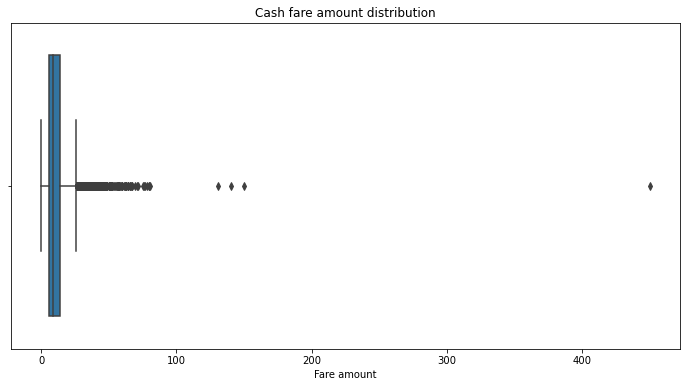

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = cash, x = 'fare_amount')
plt.title('Cash fare amount distribution')
plt.xlabel('Fare amount')
plt.show()

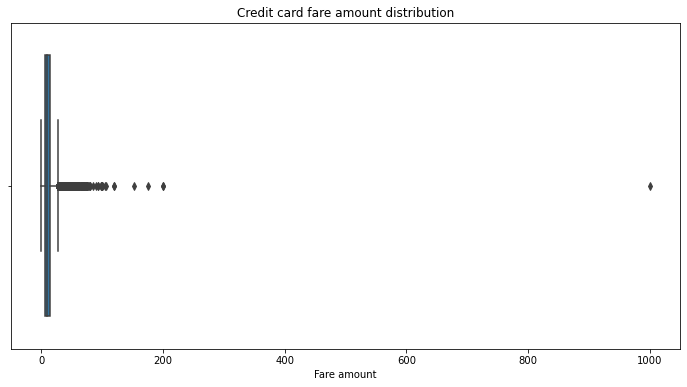

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = card, x = 'fare_amount')
plt.title('Credit card fare amount distribution')
plt.xlabel('Fare amount')
plt.show()

In [35]:
stats.ttest_ind(cash['fare_amount'], card['fare_amount'], equal_var = False)

Ttest_indResult(statistic=-6.866800855655372, pvalue=6.797387473030518e-12)

* The p-value is approx 0 so we reject the null hypothesis that there's no diference in fare amount between the payment types credit card and cash. In ohter words there's statistical evidence with a significance level of 0.05 that the mean of fare amount of credit card payments are diferente from the mean of cash 

<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 4. Communicate insights with stakeholders

*Ask yourself the following questions:*

1. What business insight(s) can you draw from the result of your hypothesis test?
2. Consider why this A/B test project might not be realistic, and what assumptions had to be made for this educational project.

The key business insight is that encouraging customers to pay with credit cards can generate more revenue for taxi cab drivers.

This project requires an assumption that passengers were forced to pay one way or the other, and that once informed of this requirement, they always complied with it. The data was not collected this way; so, an assumption had to be made to randomly group data entries to perform an A/B test. This dataset does not account for other likely explanations. For example, riders might not carry lots of cash, so it's easier to pay for longer/farther trips with a credit card. In other words, it's far more likely that fare amount determines payment type, rather than vice versa.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.